In [1]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random 
import gc


In [2]:
train_outdoor_dir = 'data/train/outdoor'
train_indoor_dir = 'data/train/indoor'
test_outdoor_dir = 'data/test/outdoor'
test_indoor_dir = 'data/test/indoor'

train_outdoor = ['data/train/outdoor/{}'.format(i) for i in os.listdir(train_outdoor_dir)] 
train_indoor = ['data/train/indoor/{}'.format(i) for i in os.listdir(train_indoor_dir)] 

test_outdoor = ['data/test/outdoor/{}'.format(i) for i in os.listdir(test_outdoor_dir)] 
test_indoor = ['data/test/indoor/{}'.format(i) for i in os.listdir(test_indoor_dir)] 

train_img_labels = [1] * len(train_outdoor) + [0] * len(train_indoor)
test_img_labels = [1] * len(test_outdoor) + [0] * len(test_indoor)

test_imgs = test_outdoor + test_indoor
train_imgs = train_outdoor + train_indoor

# random.Random(1).shuffle(test_imgs)
# random.Random(1).shuffle(test_img_labels)

random.Random(0).shuffle(train_imgs)
random.Random(0).shuffle(train_img_labels)


del train_outdoor
del train_indoor
del test_outdoor
del test_indoor

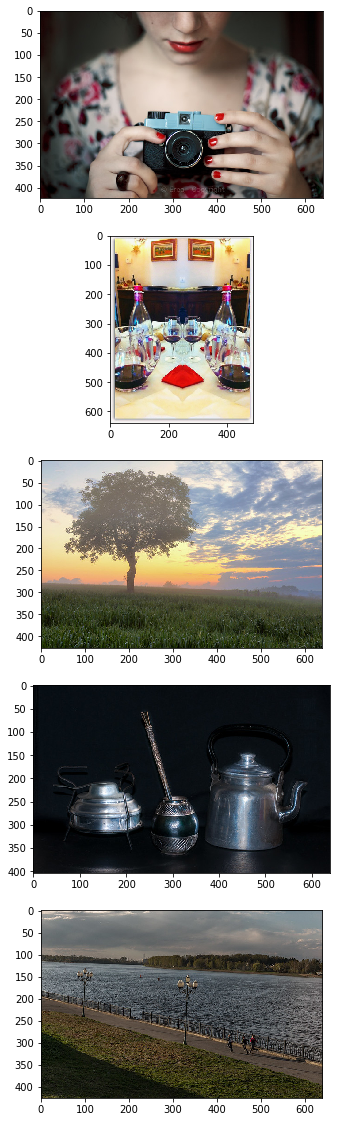

In [3]:
import matplotlib.image as mpimg

fig, ax = plt.subplots(5,1,figsize= (10, 20))

album = []
for im in train_imgs[0:5]:
    img = mpimg.imread(im)
    album.append(img)
for i in range(len(album)):
    ax[i].imshow(album[i])


In [4]:
nrows = 150
ncolumns = 150
channels = 3

In [5]:
def read_and_process_image(list_of_images):
    X = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns), interpolation = cv2.INTER_CUBIC))
        
    return X
X = read_and_process_image(train_imgs)     

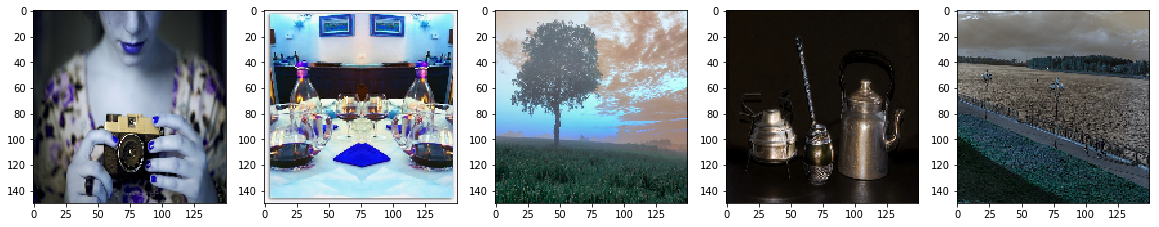

In [6]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1,columns, i+1)
    plt.imshow(X[i])

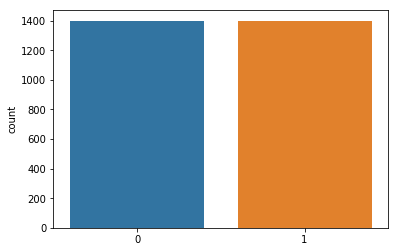

In [7]:
import seaborn as sns
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(train_img_labels)

#checking our labels to make sure they are correct--should be 1400 count for each label
sns.countplot(y)


In [8]:
print("Shape of train images is: ", X.shape)
print("Shape of labels is: ", y.shape)

Shape of train images is:  (2794, 150, 150, 3)
Shape of labels is:  (2794,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=2)


print("Shape of train images is: ", X_train.shape)
print("Shape of validation images is: ", X_val.shape)
print("Shape of labels: ", y_train.shape)
print("Shape of labels: ", y_val.shape)

Shape of train images is:  (2235, 150, 150, 3)
Shape of validation images is:  (559, 150, 150, 3)
Shape of labels:  (2235,)
Shape of labels:  (559,)


In [10]:
del X
del y
gc.collect()

ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [11]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [17]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=ntrain//batch_size,
                             epochs=64, 
                             validation_data = val_generator,
                              validation_steps= nval//batch_size)

Epoch 1/64
69/69 [==============================] - 33s 480ms/step - loss: 0.4613 - acc: 0.7957 - val_loss: 0.3278 - val_acc: 0.8474
Epoch 2/64
69/69 [==============================] - 33s 480ms/step - loss: 0.4065 - acc: 0.8252 - val_loss: 0.4847 - val_acc: 0.7552
Epoch 3/64
69/69 [==============================] - 33s 483ms/step - loss: 0.3774 - acc: 0.8370 - val_loss: 0.3580 - val_acc: 0.7685
Epoch 4/64
69/69 [==============================] - 31s 454ms/step - loss: 0.3623 - acc: 0.8466 - val_loss: 0.1663 - val_acc: 0.8710
Epoch 5/64
69/69 [==============================] - 32s 465ms/step - loss: 0.3288 - acc: 0.8638 - val_loss: 0.2657 - val_acc: 0.8444
Epoch 6/64
69/69 [==============================] - 32s 459ms/step - loss: 0.3110 - acc: 0.8706 - val_loss: 0.4613 - val_acc: 0.7932
Epoch 7/64
69/69 [==============================] - 32s 459ms/step - loss: 0.2986 - acc: 0.8756 - val_loss: 0.4177 - val_acc: 0.8956
Epoch 8/64
69/69 [==============================] - 31s 444ms/step - 

69/69 [==============================] - 38s 547ms/step - loss: 0.1580 - acc: 0.9386 - val_loss: 0.2358 - val_acc: 0.9203
Epoch 63/64
69/69 [==============================] - 31s 456ms/step - loss: 0.1453 - acc: 0.9384 - val_loss: 0.2396 - val_acc: 0.9336
Epoch 64/64
69/69 [==============================] - 32s 458ms/step - loss: 0.1436 - acc: 0.9424 - val_loss: 0.3104 - val_acc: 0.9279


In [18]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

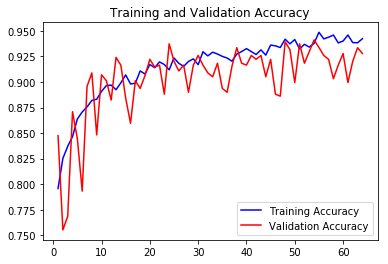

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label ='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.savefig('Accuracy.jpg')
plt.show()


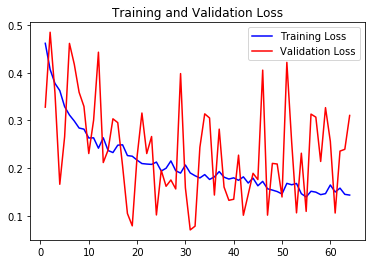

In [90]:
plt.plot(epochs, loss, 'b', label ='Training Loss')
plt.plot(epochs, val_loss, 'r', label ='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.savefig('Loss.jpg')
plt.show()

In [53]:
X_test = read_and_process_image(test_imgs[0:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
#ignore this code as it used went through a "batch" to display images    

# i = 0
# text_labels = []
# plt.figure(figsize=(30,20))
# for batch in test_datagen.flow(x,batch_size=1):
#     pred = model.predict(batch)
#     if pred > 0.5:
#         text_labels.append('outdoor')
#     else:
#         text_labels.append('indoor')
#     plt.subplot(5 / columns + 1, columns, i+1)
#     plt.title('This is '+ text_labels[i])
#     imgplot = plt.imshow(batch[0])
#     i += 1
#     if i%10 ==0:
#         break
# plt.show()

In [ ]:
#"scratch work"
# i = 0
# plt.figure(figsize=(30,20))
# for batch in test_datagen.flow(x,batch_size=1):
#     pred = model.predict(batch)
#     if pred > 0.5:
#         text_labels.append('outdoor')
#     else:
#         text_labels.append('indoor')
#     plt.subplot(5 / columns + 1, columns, i+1)
#     plt.title('This is '+ text_labels[i])
#     imgplot = plt.imshow(batch[0])
#     i += 1
#     if i%10 ==0:
#         break
# plt.show()


# X_test_final = read_and_process_image(test_imgs)
# x_final = np.array(X_test_final)
# test_datagen = ImageDataGenerator(rescale=1./255)
# y = read_and_process_image(test_imgs)     
# for i in range(columns):
#     plt.subplot(5/columns+1,columns, i+1)
#     plt.imshow(X[i])for i in range(columns):
#     plt.subplot(5/columns+1,columns, i+1)
#     plt.imshow(X[i])

In [73]:
y = read_and_process_image(test_imgs) 
y_final = np.array(y)
predictions = model.predict(y_final)
num_labels = []
text_labels = []
for i in range (len(y)):
    if predictions[i] > 0.5:
        text_labels.append('outdoor')
        num_labels.append(1)
    else:
        text_labels.append('indoor')
        num_labels.append(0)

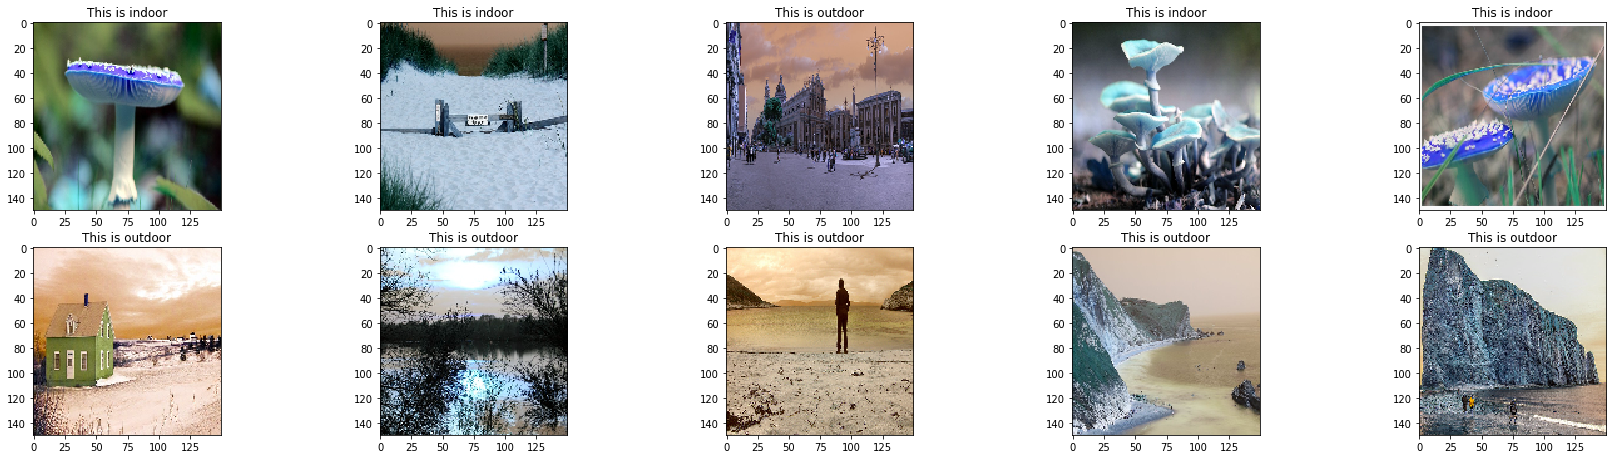

In [68]:
#checking the predictions for the first 10 images

plt.figure(figsize=(30,20))

for i in range (len(y)):   
    plt.subplot(5, columns, i+1)
    plt.title('This is '+ text_labels[i])
    imgplot = plt.imshow(y[i])
    if i ==9:
        break
plt.show()

In [81]:
len(test_imgs)

1200

In [74]:
#identifying all the incorrect predictions

incorr_imgs = []
incorr_labels = []
for i in range (len(y)):
    if num_labels[i]!=test_img_labels[i]:
        incorr_imgs.append(y[i])
        incorr_labels.append(text_labels[i])


In [75]:
len(incorr_imgs)

248

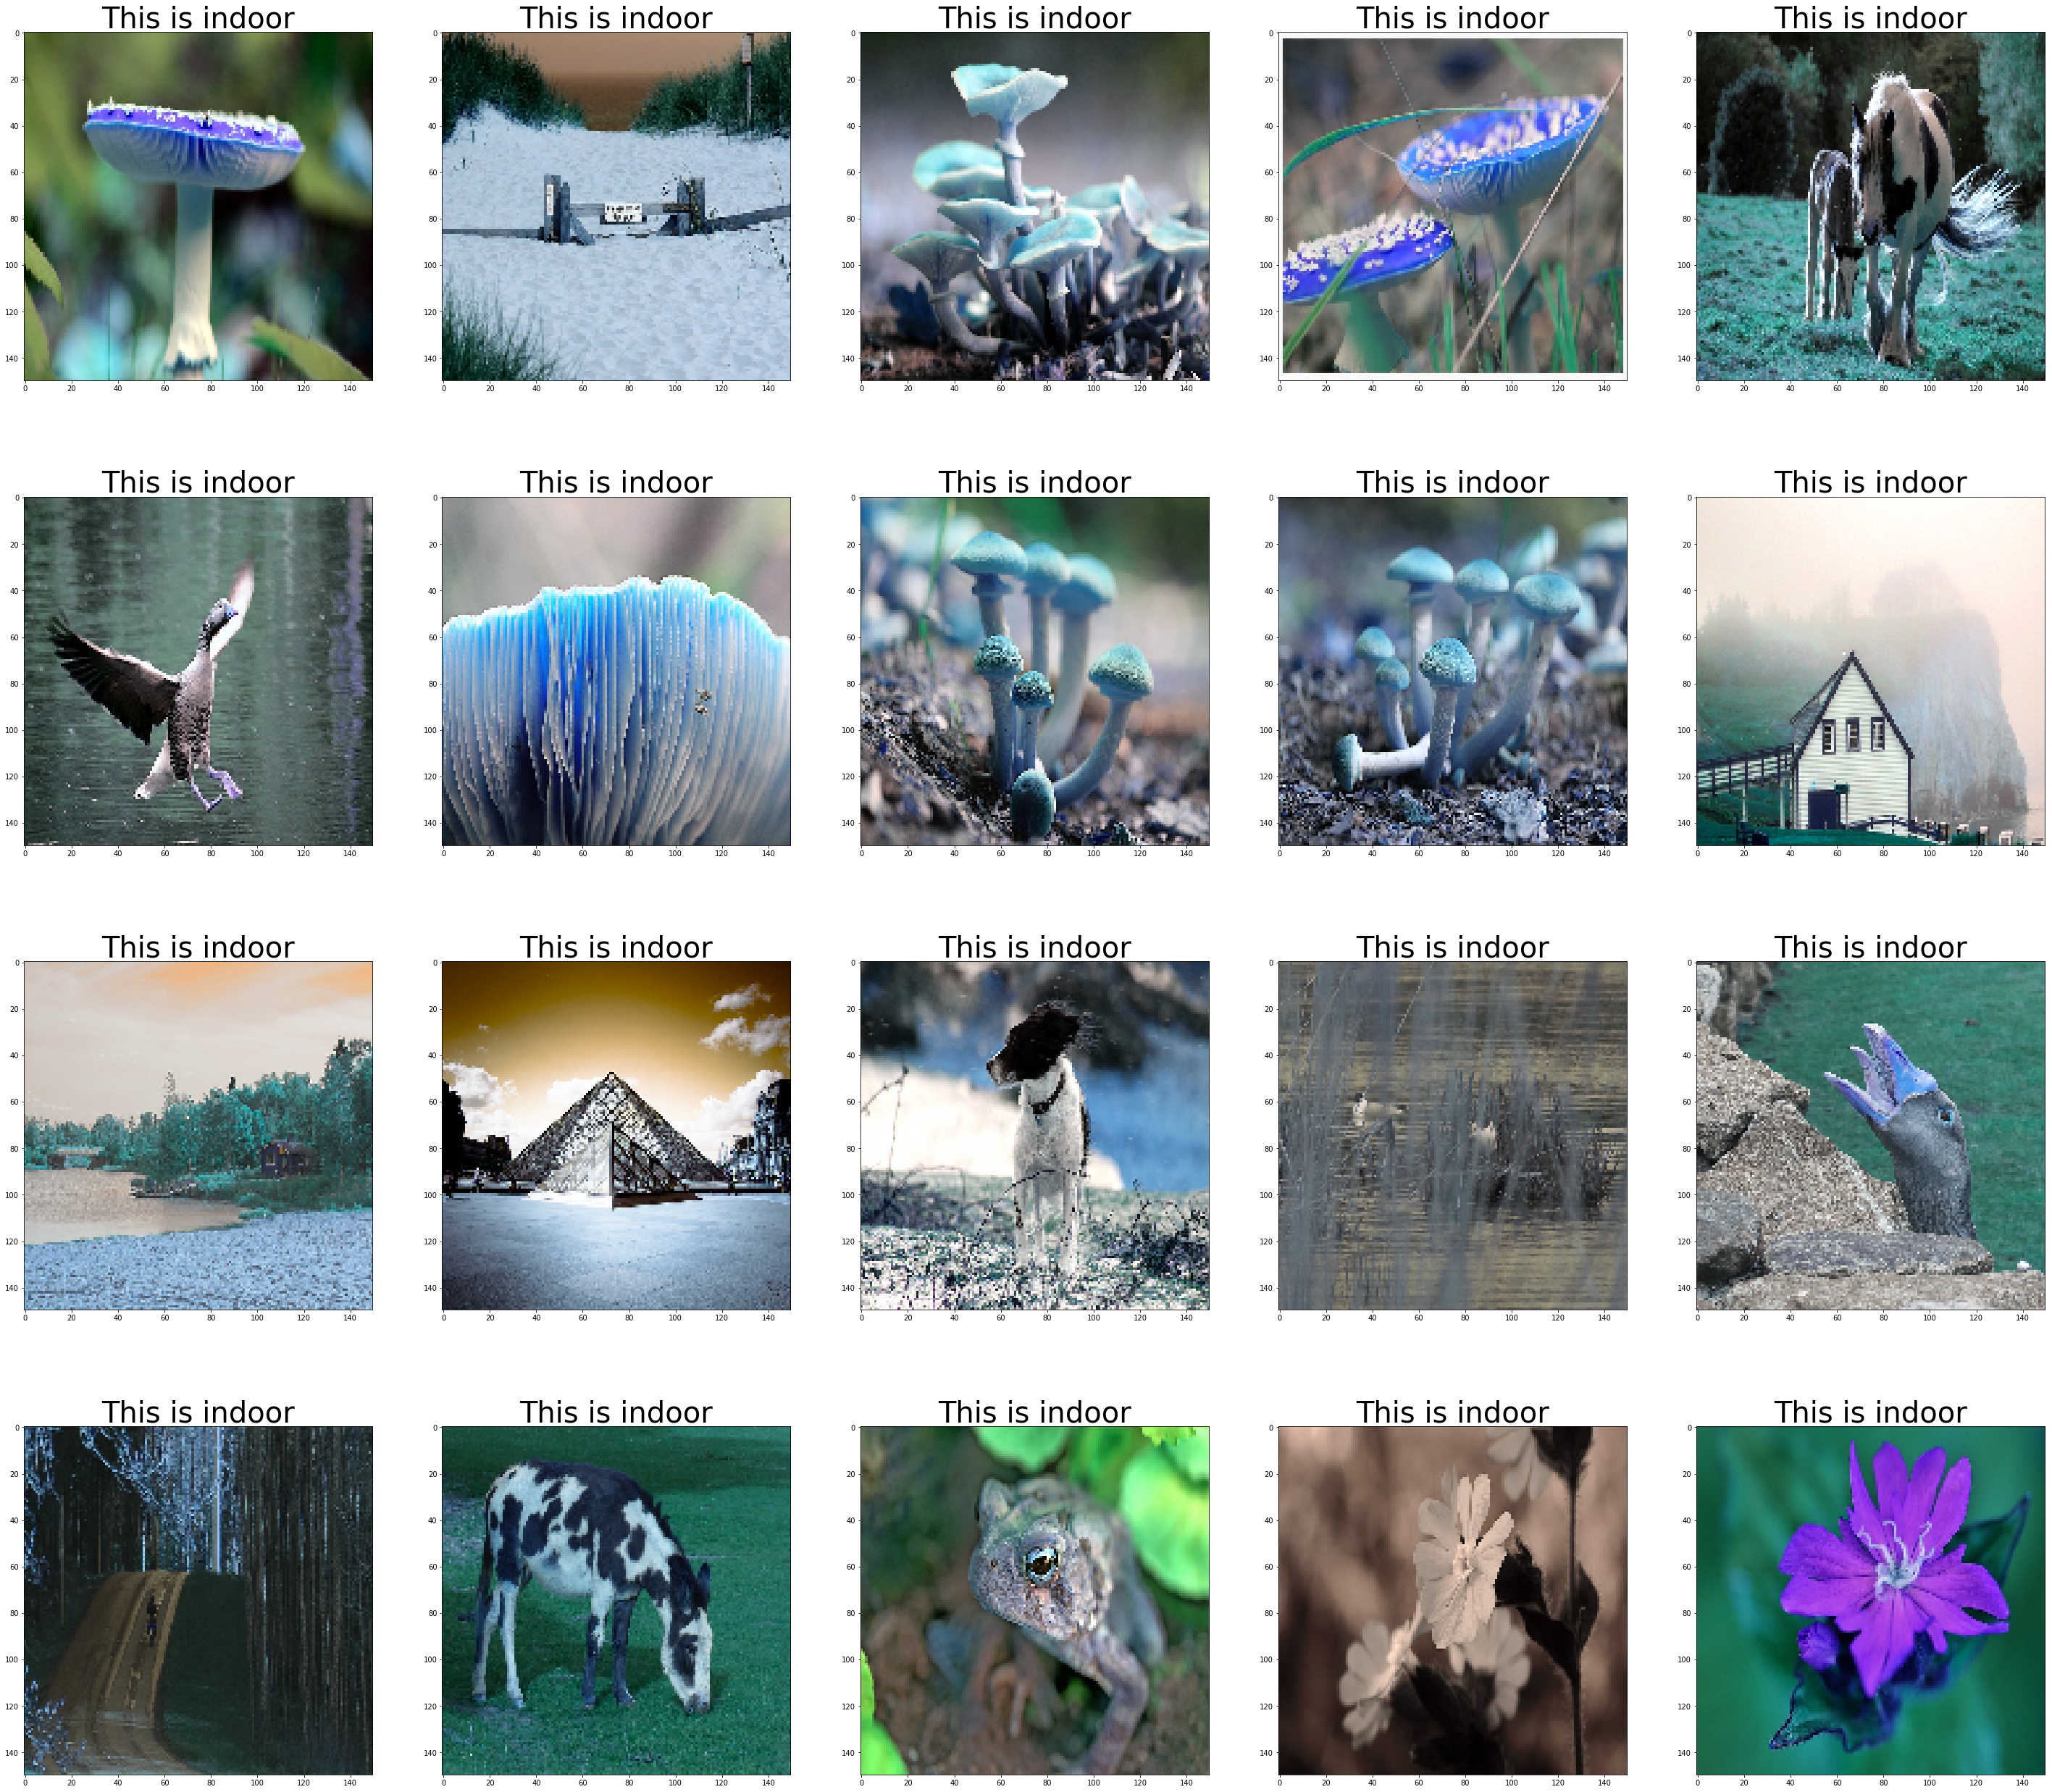

In [97]:
#display incorrect predictions

plt.figure(figsize=(50,600))

for i in range(len(incorr_imgs)):
    plt.subplot(len(incorr_imgs)/5+2, 5, i+1)
    plt.title('This is '+ incorr_labels[i], size = 40)
    imgplot = plt.imshow(incorr_imgs[i])
    
    if i ==19:
        break
        
plt.savefig('incorrect_prediction.jpg')        
plt.show()

In [91]:
#all the incorrect labels are indoor! 
incorr_labels

['indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',
 'indoor',

In [77]:
y_pred = []
for i in range(len(predictions)):
    if predictions[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


from sklearn import metrics
print(metrics.accuracy_score(test_img_labels, y_pred))

0.7933333333333333


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
